<a href="https://colab.research.google.com/github/esraa079154-oss/FinalDataEngineer/blob/main/SVM_ML1_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sushant097/heart-disease-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-classification' dataset.
Path to dataset files: /kaggle/input/heart-disease-classification


In [ ]:
data = pd.read_csv(path + "/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


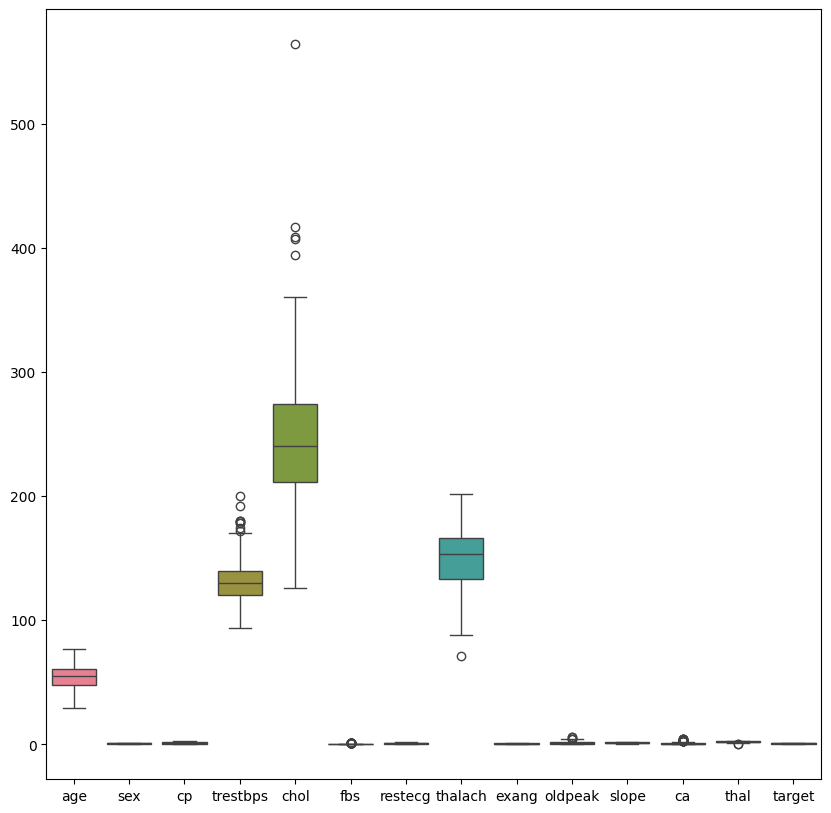

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)
plt.show()

In [ ]:
x = data.drop('target',axis=1)
y = data['target']
target_names = ['yes' , 'no']

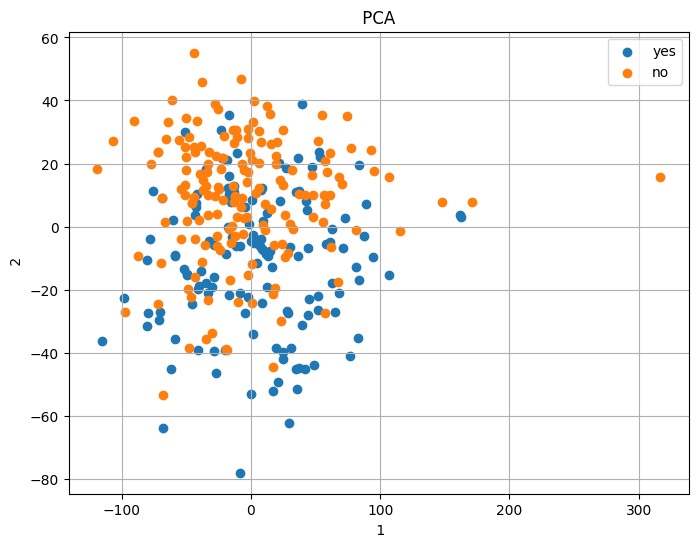

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel(' 1')
plt.ylabel(' 2')
plt.title(' PCA ')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
scaler = StandardScaler()
scaler_m = scaler.fit(x)
x = scaler_m.transform(x)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , stratify=y)

In [ ]:
svc_model = SVC(kernel='poly' , C=100)
svc_model.fit(x_train,y_train)

SVC(C=100, kernel='poly')

In [ ]:
y_predict = svc_model.predict(x_test)
acc = accuracy_score(y_test , y_predict)
print(acc)

0.7377049180327869


In [ ]:
confusion_matrix(y_test , y_predict)

array([[20,  8],
       [ 8, 25]])

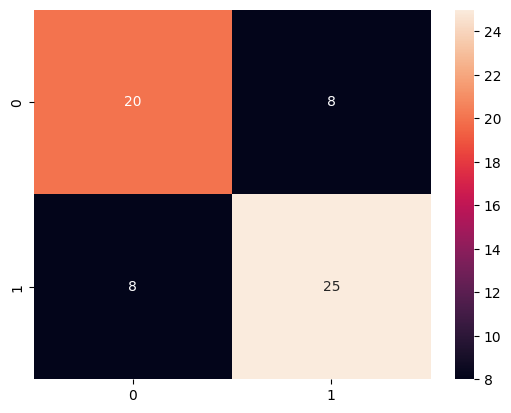

In [ ]:
sns.heatmap(confusion_matrix(y_test , y_predict) , annot=True)
plt.show()

In [ ]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.76      0.76      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
y_train.value_counts()

,count
target,
1,132
0,110


In [ ]:
train_pre = svc_model.predict(x_train)
acc = accuracy_score(y_train , train_pre)
print(acc)

1.0


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

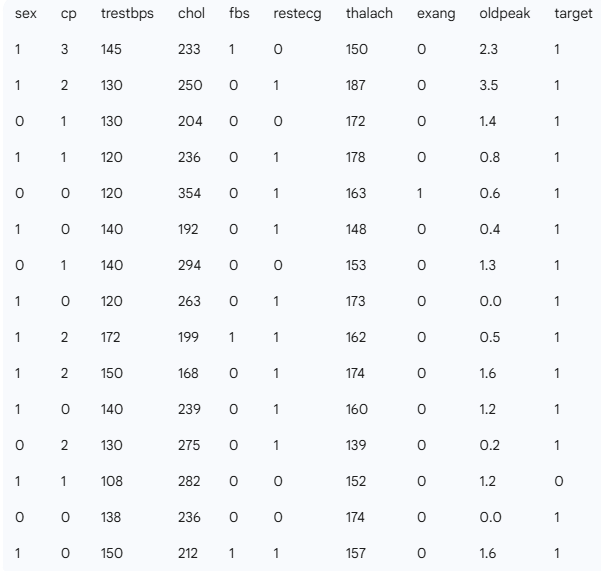

In [ ]:
age = int(input("Enter age : "))
sex = int(input("Enter sex : "))
cp = int(input("Enter cp : "))
trestbps = int(input("Enter trestbps : "))
chol = int(input("Enter chol : "))
fbs = int(input("Enter fbs : "))
restecg = int(input("Enter restecg : "))
thalach = int(input("Enter thalach : "))
exang = int(input("Enter exang : "))
oldpeak = float(input("Enter oldpeak : "))
slope = int(input("Enter slope : "))
ca = int(input("Enter ca : "))
thal = int(input("Enter thal : "))


Enter age : 50
Enter sex : 1
Enter cp : 3
Enter trestbps : 145
Enter chol : 233
Enter fbs : 1
Enter restecg : 0
Enter thalach : 150
Enter exang : 0
Enter oldpeak : 2.3
Enter slope : 1
Enter ca : 1
Enter thal : 2


In [ ]:
row = []
